# KMeans Learning

- `np.linalg.norm` to calculate vector distances
- `X[:, np.newaxis]` to add a new axis
- `X[np.random.permutation(len(X))[:K]]` selecting K points from X
  - `np.random.permutation` generates random permutation of indices
  - `[:K]` selects first K elements


In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

SEED = 42
K = 3  # Number of clusters
MAX_ITER = 100  # Maximum number of iterations

np.random.seed(SEED)

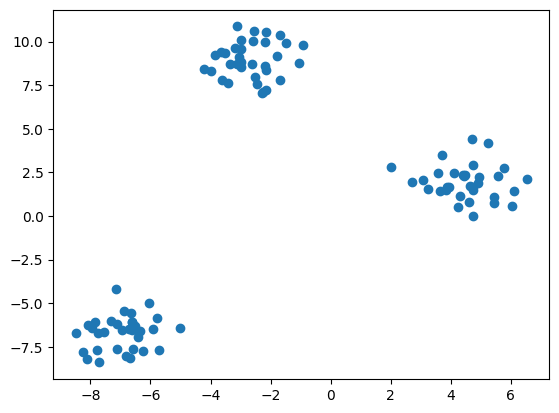

In [3]:
X, y = make_blobs(n_samples=100, centers=K, random_state=SEED)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Test of basic KMeans code


Initialising initial centroids, choosing random points from X to be a centroid


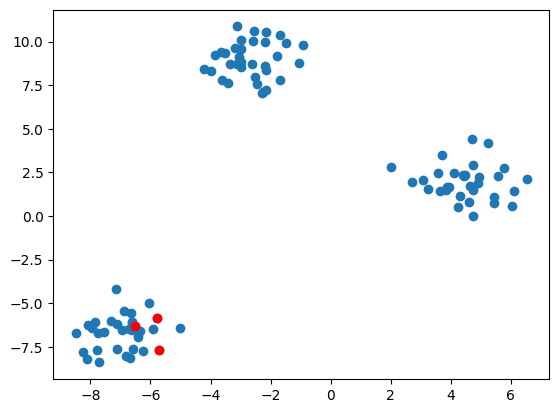

Initial centroids:
Centroid 0: [-5.79657595 -5.82630754]
Centroid 1: [-6.52183983 -6.31932507]
Centroid 2: [-5.72103161 -7.70079191]


In [7]:
initial_centroids = X[np.random.permutation(len(X))[:K]]

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red')
plt.show()

print("Initial centroids:")
for i, centroid in enumerate(initial_centroids):
    print(f"Centroid {i}: {centroid}")

Then calculate the distance from each point to each centroid. The point will belong to the class of the centroid closest to it.


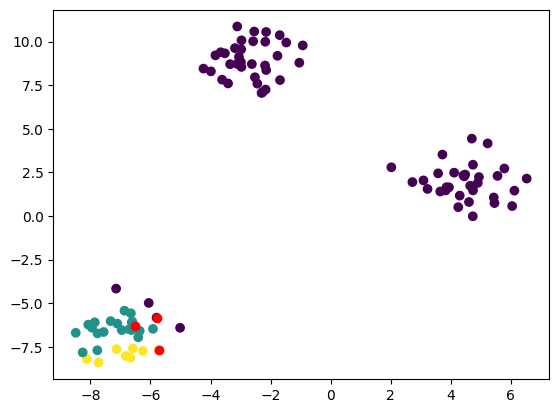

In [15]:
# Using numpy broadcasting
distances = np.linalg.norm(X[:, np.newaxis] - initial_centroids, axis=2)
classes = np.argmin(distances, axis=1)

plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red')
plt.show()

Calculating the new centroids


In [16]:
X[classes == 0].mean(axis=0)

array([0.47558052, 4.87921671])

In [17]:
# This is what I want to do
np.array([X[classes == 0].mean(axis=0), X[classes == 1].mean(
    axis=0), X[classes == 2].mean(axis=0)])

array([[ 0.47558052,  4.87921671],
       [-7.16083931, -6.45373774],
       [-6.87706403, -7.92635214]])

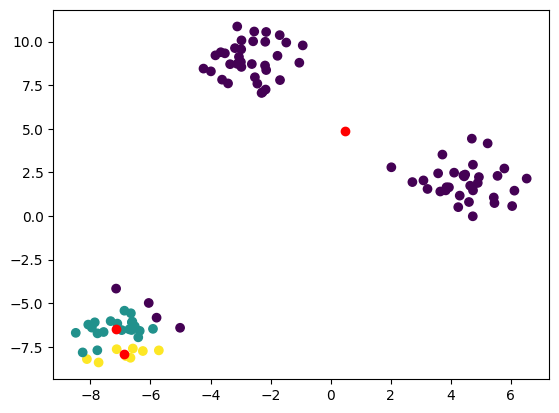

In [18]:
# Implemented
new_centroids = np.array([X[classes == k].mean(axis=0) for k in range(K)])
plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red')
plt.show()

New classes according to new centroids


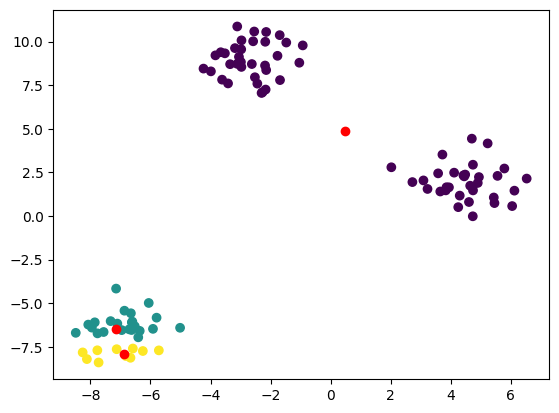

In [19]:
distances = np.linalg.norm(X[:, np.newaxis] - new_centroids, axis=2)
classes = np.argmin(distances, axis=1)

plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red')
plt.show()

## Naive KMeans

Runs for MAX_ITER


MAX_ITER=100
Ran for 100


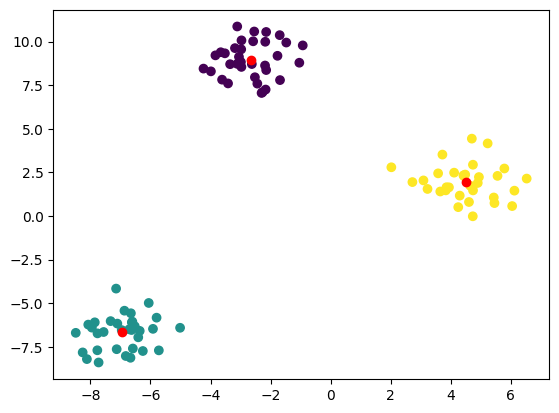

In [20]:
centroids = X[np.random.permutation(len(X))[:K]]
for i in range(MAX_ITER):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    classes = np.argmin(distances, axis=1)
    centroids = np.array([X[classes == k].mean(axis=0) for k in range(K)])

print(f'{MAX_ITER=}')
print(f'Ran for {i+1}')
plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

## KMeans with Convergence Check

Runs until centroids do not change much, up till MAX_ITER


MAX_ITER=100
Ran for 2


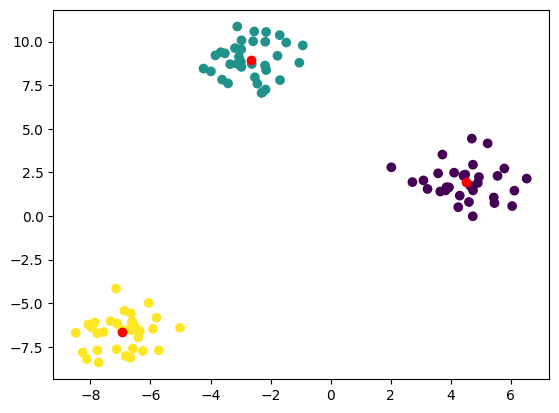

In [21]:
centroids = X[np.random.permutation(len(X))[:K]]

for i in range(MAX_ITER):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    classes = np.argmin(distances, axis=1)
    new_centroids = np.array([X[classes == k].mean(axis=0) for k in range(K)])

    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids

print(f'{MAX_ITER=}')
print(f'Ran for {i+1}')

plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

## Elbow Method


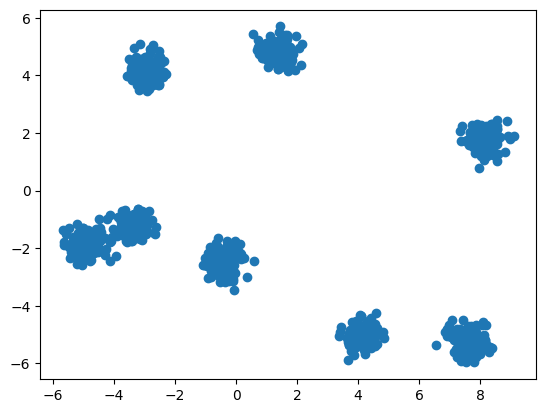

In [22]:
from sklearn.cluster import KMeans

X, y = make_blobs(1000, centers=8, cluster_std=0.3)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Elbow method manually


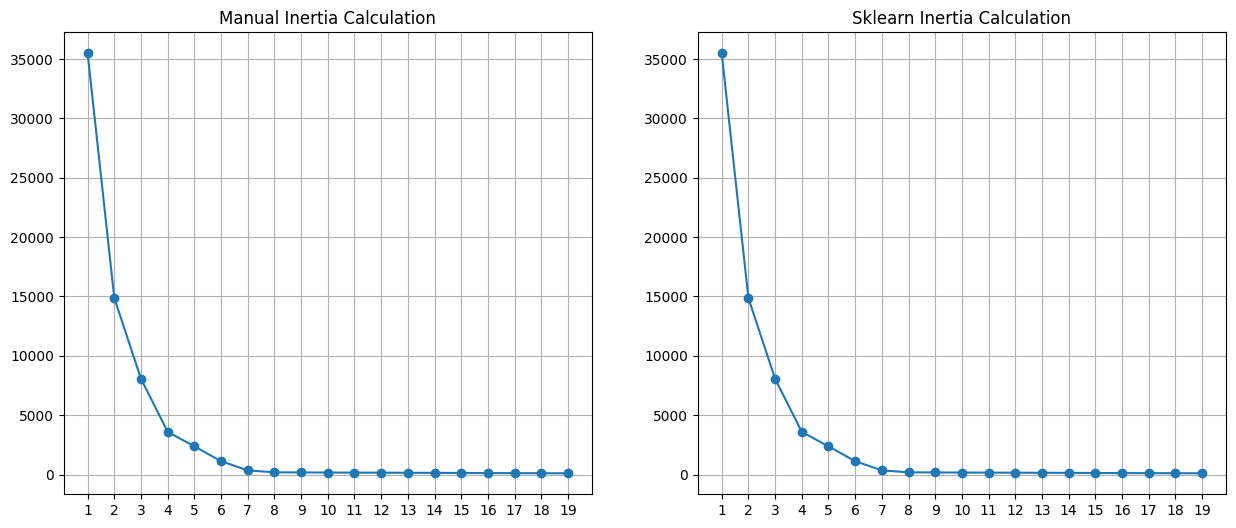

In [57]:
NUM_REPETITIONS = 20
manual_inertia_arr = []
sklearn_inertia_arr = []

for i in range(1, NUM_REPETITIONS):
    kmeans = KMeans(n_clusters=i, random_state=SEED).fit(X)

    inertia = 0
    for k in range(i):
        cluster_points = X[kmeans.labels_ == k]
        centroid = kmeans.cluster_centers_[k]

        squared_dist = np.linalg.norm(cluster_points - centroid, axis=1) ** 2
        inertia += squared_dist.sum()

    manual_inertia_arr.append(inertia)
    sklearn_inertia_arr.append(kmeans.inertia_)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Manual Inertia Calculation')
plt.plot(range(1, NUM_REPETITIONS), manual_inertia_arr, marker='o')
plt.xticks(range(1, NUM_REPETITIONS))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Sklearn Inertia Calculation')
plt.plot(range(1, NUM_REPETITIONS), sklearn_inertia_arr, marker='o')
plt.xticks(range(1, NUM_REPETITIONS))
plt.grid(True)

plt.show()

## Silhouette Score


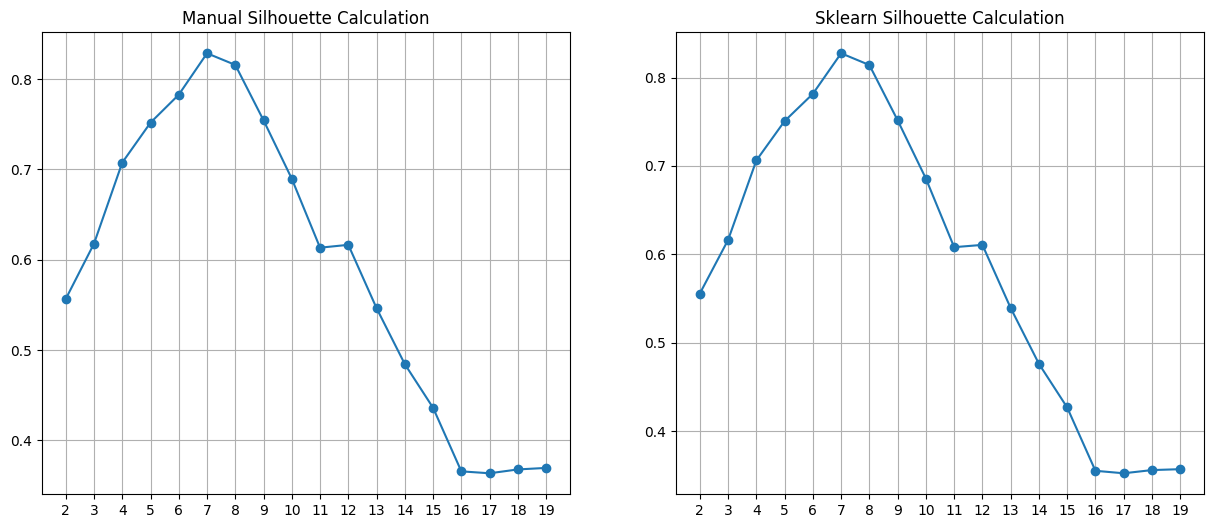

In [ ]:
from sklearn.metrics import silhouette_score

NUM_REPETITIONS = 20
manual_sil_score = []
sklearn_sil_score = []

for k in range(2, NUM_REPETITIONS):
    kmeans = KMeans(n_clusters=k, random_state=SEED).fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    sil_scores = []

    for idx, point in enumerate(X):
        # Cluster of current point
        cluster_id = labels[idx]
        # Get all points in the same cluster as the current point
        same_cluster = X[labels == cluster_id]
        # Compute average intra-cluster distance (a)
        a = np.mean(np.linalg.norm(same_cluster - point, axis=1))

        # Calculate distance from current point to all cluster centers
        centroid_distances = np.linalg.norm(
            centers - point, axis=1)
        # Exclude the cluster of the current point by setting its distance to infinity
        centroid_distances[cluster_id] = np.inf
        # Find the nearest cluster center different from current cluster
        nearest_cluster_id = np.argmin(centroid_distances)
        # Get all points in the nearest different cluster
        nearest_cluster_points = X[labels == nearest_cluster_id]
        # Compute average distance from current point to all points in nearest cluster (b)
        b = np.mean(np.linalg.norm(nearest_cluster_points - point, axis=1))

        sil_score = (b - a) / max(a, b)
        sil_scores.append(sil_score)

    manual_sil_score.append(np.mean(sil_scores))
    sklearn_sil_score.append(silhouette_score(X, labels))

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Manual Silhouette Calculation')
plt.plot(range(2, NUM_REPETITIONS), manual_sil_score, marker='o')
plt.xticks(range(2, NUM_REPETITIONS))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Sklearn Silhouette Calculation')
plt.plot(range(2, NUM_REPETITIONS), sklearn_sil_score, marker='o')
plt.xticks(range(2, NUM_REPETITIONS))
plt.grid(True)

plt.show()